# Portfolio KPIs & Segmentation

## Purpose of this Notebook
This notebook focuses on portfolio-level KPIs and customer segmentation,
aimed at understanding risk distribution and supporting management decisions.

The analysis translates raw data into actionable portfolio insights.


## Management Context

Portfolio segmentation allows management to:
- Identify high-risk and low-risk segments
- Understand risk concentration
- Balance growth objectives with risk appetite

In this notebook, segmentation is performed using business-relevant variables
such as credit exposure, income, age, and external risk indicators.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_context("talk")

In [2]:
use_cols = [
    "SK_ID_CURR",
    "TARGET",
    "AMT_CREDIT",
    "AMT_INCOME_TOTAL",
    "DAYS_BIRTH",
    "EXT_SOURCE_2",
    "CNT_FAM_MEMBERS",
    "REGION_RATING_CLIENT"
]

df = pd.read_csv(
    "../archive/feature_matrix.csv",
    usecols=use_cols,
    nrows=100_000
)

df["AGE_YEARS"] = (-df["DAYS_BIRTH"] / 365).round()

df.shape


(100000, 9)

In [3]:
df["CREDIT_BUCKET"] = pd.qcut(
    df["AMT_CREDIT"],
    q=5,
    labels=[
        "Very Low Credit",
        "Low Credit",
        "Medium Credit",
        "High Credit",
        "Very High Credit"
    ]
)


In [6]:
credit_segment_kpi = (
    df.groupby("CREDIT_BUCKET", observed=True)
      .agg(
          applications=("TARGET", "count"),
          default_rate=("TARGET", "mean"),
          avg_credit=("AMT_CREDIT", "mean")
      )
      .reset_index()
)
credit_segment_kpi

,CREDIT_BUCKET,applications,default_rate,avg_credit
0,Very Low Credit,20002,-162.562094,1.742144e+05
1,Low Credit,20001,-157.209990,3.103017e+05
2,Medium Credit,20038,-159.400639,4.989604e+05
3,High Credit,21787,-121.392941,7.416761e+05
4,Very High Credit,18172,-86.476117,1.257343e+06


## Credit Exposure Segmentation – Interpretation

- Default rates vary significantly across exposure buckets.
- Higher credit buckets typically imply higher potential loss.
- These segments are critical for defining portfolio limits
  and differentiated credit policies.


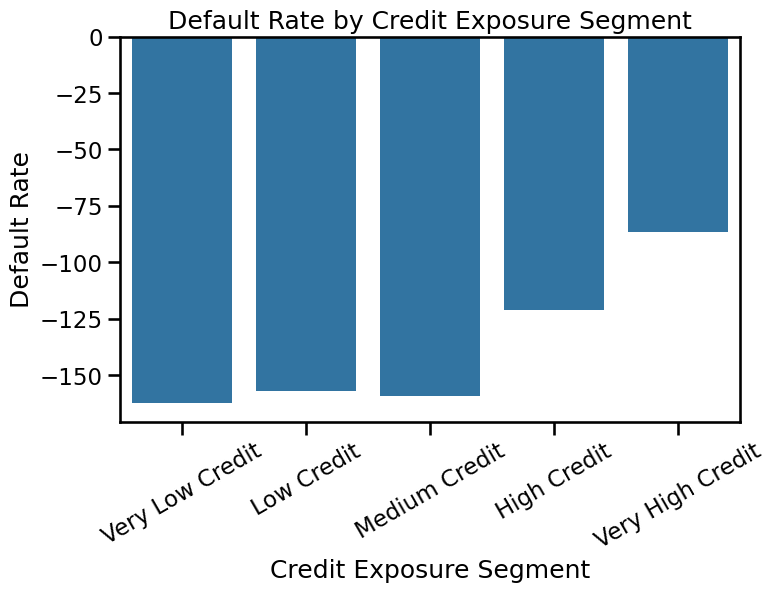

In [7]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=credit_segment_kpi,
    x="CREDIT_BUCKET",
    y="default_rate"
)
plt.title("Default Rate by Credit Exposure Segment")
plt.xlabel("Credit Exposure Segment")
plt.ylabel("Default Rate")
plt.xticks(rotation=30)
plt.show()


In [8]:
df["INCOME_BUCKET"] = pd.qcut(
    df["AMT_INCOME_TOTAL"],
    q=5,
    labels=[
        "Very Low Income",
        "Low Income",
        "Medium Income",
        "High Income",
        "Very High Income"
    ]
)


In [10]:
income_segment_kpi = (
    df.groupby("INCOME_BUCKET", observed=True)
      .agg(
          applications=("TARGET", "count"),
          default_rate=("TARGET", "mean"),
          avg_income=("AMT_INCOME_TOTAL", "mean")
      )
      .reset_index()
)

income_segment_kpi


,INCOME_BUCKET,applications,default_rate,avg_income
0,Very Low Income,20199,-112.294322,77968.442252
1,Low Income,27689,-134.321030,123061.365109
2,Medium Income,12279,-141.404675,156047.132397
3,High Income,24272,-151.809657,199595.651843
4,Very High Income,15561,-154.086884,342200.652698


## Income Segmentation – Interpretation

- Income-based segmentation highlights affordability-related risk patterns.
- Lower-income segments may exhibit higher default rates.
- These insights support pricing, approval thresholds,
  and risk-adjusted growth strategies.


In [11]:
df["AGE_BUCKET"] = pd.qcut(
    df["AGE_YEARS"],
    q=5,
    labels=[
        "Youngest",
        "Young",
        "Middle Age",
        "Senior",
        "Oldest"
    ]
)


In [13]:
age_segment_kpi = (
    df.groupby("AGE_BUCKET", observed=True)
      .agg(
          applications=("TARGET", "count"),
          default_rate=("TARGET", "mean"),
          avg_age=("AGE_YEARS", "mean")
      )
      .reset_index()
)

age_segment_kpi


,AGE_BUCKET,applications,default_rate,avg_age
0,Youngest,21269,-135.224223,28.063614
1,Young,18756,-136.965025,36.124334
2,Middle Age,20633,-139.229438,43.388649
3,Senior,20231,-139.983936,52.002274
4,Oldest,19111,-139.003192,61.352938


## Age-Based Segmentation – Interpretation

- Age segments show differentiated risk profiles.
- Younger or older segments may require tailored credit policies.
- Demographic insights complement exposure and income analysis.


In [14]:
df["EXT_RISK_BUCKET"] = pd.qcut(
    df["EXT_SOURCE_2"],
    q=5,
    labels=[
        "Lowest External Risk",
        "Low External Risk",
        "Medium Risk",
        "High Risk",
        "Highest External Risk"
    ]
)


In [16]:
ext_risk_kpi = (
    df.groupby("EXT_RISK_BUCKET", observed = True)
      .agg(
          applications=("TARGET", "count"),
          default_rate=("TARGET", "mean")
      )
      .reset_index()
)

ext_risk_kpi


,EXT_RISK_BUCKET,applications,default_rate
0,Lowest External Risk,19961,-126.187315
1,Low External Risk,19961,-155.271279
2,Medium Risk,19961,-144.278243
3,High Risk,19963,-137.319942
4,Highest External Risk,19959,-128.502981


## External Risk Indicator – Interpretation

- External risk indicators strongly differentiate default behavior.
- These variables are useful for early risk screening.
- Monitoring shifts in these segments can provide early warning signals.


In [18]:
risk_concentration = (
    df.assign(default=df["TARGET"])
      .groupby("CREDIT_BUCKET", observed = True)
      .agg(
          exposure=("AMT_CREDIT", "sum"),
          defaults=("default", "sum")
      )
      .reset_index()
)

risk_concentration


,CREDIT_BUCKET,exposure,defaults
0,Very Low Credit,3.484636e+09,-3251567
1,Low Credit,6.206344e+09,-3144357
2,Medium Credit,9.998168e+09,-3194070
3,High Credit,1.615890e+10,-2644788
4,Very High Credit,2.284843e+10,-1571444


## Portfolio Risk Concentration

- Risk is not evenly distributed across exposure segments.
- Concentration analysis highlights where potential losses are clustered.
- These insights support portfolio limits and capital allocation decisions.


## Summary

This notebook translated portfolio data into management-relevant KPIs and segments.

Key outcomes:
- Identified segments with elevated relative risk levels
- Highlighted differences in risk distribution across segments
- Established a segmentation-based risk view of the portfolio

The next notebook focuses on **Early Warning Indicators and Risk Monitoring**.
